In [1]:
from google.colab import files
uploaded = files.upload()


Saving Preprocessed World University Rankings 2023 Dataset.csv to Preprocessed World University Rankings 2023 Dataset.csv


Mean Squared Error: 0.0013921505755095428
R-squared: 0.19541143478621814


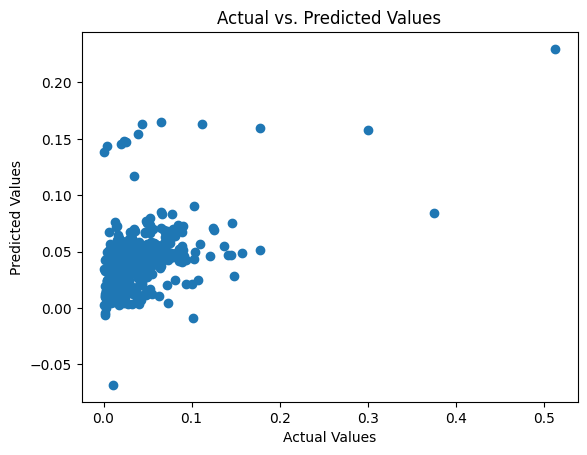

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the original data from the CSV file into a DataFrame
df = pd.read_csv("Preprocessed World University Rankings 2023 Dataset.csv")

# Select the numeric columns for normalization
numeric_columns = df.select_dtypes(include='number')

# Automatically select the first numeric column as the target variable
target_column = numeric_columns.columns[0]

# Perform Z-score normalization
z_score_scaler = StandardScaler()
z_score_normalized = z_score_scaler.fit_transform(numeric_columns)
z_score_normalized_df = pd.DataFrame(z_score_normalized, columns=numeric_columns.columns)

# Perform Min-Max normalization
min_max_scaler = MinMaxScaler()
min_max_normalized = min_max_scaler.fit_transform(numeric_columns)
min_max_normalized_df = pd.DataFrame(min_max_normalized, columns=numeric_columns.columns)

# Define the features (independent variables)
# You can select specific columns as features or use all columns except the target
features = min_max_normalized_df.drop(columns=[target_column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, min_max_normalized_df[target_column], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
